In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
sales = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/sales_sample.csv")
sales # last 3 rows are the same

# Reshaping Data with `.melt()` Method
The melt method will allow us to unpivot or change the format of our dataset, from wide to long format.

Sometimes we will come across data where every row relates to one subject, and each column has different information about an attribute of that subject. Data formatted in this way is often called **wide**. There are other times when the information about one subject is found over many rows, and each row has one attribute about that subject. Data formatted in this way is often called **long or tall**. 

In general, wide formatted data is easier to read by people than long formatted. However, long formatted data is often more accessible for computers to work with.

![photo](https://images.squarespace-cdn.com/content/v1/618f1949e28d5e64417a9ba1/1638889101241-WU1HLSA70BZE15N7BW2Q/Untitled+picture.png)

In [ ]:
# 'sales' DataFrame is in the wide format
sales 

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment,year
0,1,A,1,2010-02-05,24924.50,False,5.728,0.679,8.106,2010
1,2,A,1,2010-03-05,21827.90,False,8.056,0.693,8.106,2010
2,3,B,1,2010-04-02,57258.43,True,16.817,0.718,7.808,2010
3,4,B,2,2010-05-07,17413.94,False,22.528,0.749,7.808,2010
4,3,B,2,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
5,6,C,2,2010-06-04,17558.09,True,27.050,0.715,7.808,2010
6,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
7,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010
8,7,C,3,2010-06-04,17558.09,False,27.050,0.715,7.808,2010


In [ ]:
sales.melt().head(20)

,variable,value
0,store,1
1,store,2
2,store,3
3,store,4
4,store,3
5,store,6
6,store,7
7,store,7
8,store,7
9,type,A


In [ ]:
# id_vars: column(s) to use as identifier variables (columns in our original dataset that we do not want to change)
sales_long = sales.melt(id_vars=["store", "type", "department"])
sales_long.head(20) 

,store,type,department,variable,value
0,1,A,1,date,2010-02-05 00:00:00
1,2,A,1,date,2010-03-05 00:00:00
2,3,B,1,date,2010-04-02 00:00:00
3,4,B,2,date,2010-05-07 00:00:00
4,3,B,2,date,2010-06-04 00:00:00
5,6,C,2,date,2010-06-04 00:00:00
6,7,C,3,date,2010-06-04 00:00:00
7,7,C,3,date,2010-06-04 00:00:00
8,7,C,3,date,2010-06-04 00:00:00
9,1,A,1,weekly_sales,24924.5


In [ ]:
# value_vars: column(s) to unpivot. If not specified, uses all columns that are not set as id_vars.
sales_long = sales.melt(id_vars=["store", "type", "department"], value_vars=["weekly_sales"])
sales_long

,store,type,department,variable,value
0,1,A,1,weekly_sales,24924.50
1,2,A,1,weekly_sales,21827.90
2,3,B,1,weekly_sales,57258.43
3,4,B,2,weekly_sales,17413.94
4,3,B,2,weekly_sales,17558.09
5,6,C,2,weekly_sales,17558.09
6,7,C,3,weekly_sales,17558.09
7,7,C,3,weekly_sales,17558.09
8,7,C,3,weekly_sales,17558.09


In [ ]:
# 'var_name' changes the variable column name. Similarly, 'value_name' changes the value column name 
sales_long = sales.melt(id_vars=["store", "type", "department"], value_vars=["weekly_sales"], var_name="sales", value_name="dollars")
sales_long

,store,type,department,sales,dollars
0,1,A,1,weekly_sales,24924.50
1,2,A,1,weekly_sales,21827.90
2,3,B,1,weekly_sales,57258.43
3,4,B,2,weekly_sales,17413.94
4,3,B,2,weekly_sales,17558.09
5,6,C,2,weekly_sales,17558.09
6,7,C,3,weekly_sales,17558.09
7,7,C,3,weekly_sales,17558.09
8,7,C,3,weekly_sales,17558.09


#### Using .melt() to reshape government data
##### Story:
The US Bureau of Labor Statistics (BLS) often provides data series in an easy-to-read format - it has a separate column for each month, and each year is a different row. Unfortunately, this wide format makes it difficult to plot this information over time. So, we will reshape a table of US unemployment rate data from the BLS into a form, using `.melt()`, that can be plotted.

In [ ]:
# Read the dataset, skipping the first 11 lines as they contain metadata
unemployment_rates = pd.read_csv("https://raw.githubusercontent.com/MohamedMostafa259/Pandas-Notes/refs/heads/main/Data/UNRATE.csv", skiprows=11)
unemployment_rates

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2014,6.6,6.7,6.7,6.2,6.3,6.1,6.2,6.1,5.9,5.7,5.8,5.6
1,2015,5.7,5.5,5.4,5.4,5.6,5.3,5.2,5.1,5.0,5.0,5.1,5.0
2,2016,4.8,4.9,5.0,5.1,4.8,4.9,4.8,4.9,5.0,4.9,4.7,4.7
3,2017,4.7,4.6,4.4,4.4,4.4,4.3,4.3,4.4,4.3,4.2,4.2,4.1
4,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9
5,2019,4.0,3.8,3.8,3.7,3.6,3.6,3.7,3.6,3.5,3.6,3.6,3.6
6,2020,3.6,3.5,4.4,14.8,13.2,11.0,10.2,8.4,7.8,6.8,6.7,6.7
7,2021,6.4,6.2,6.1,6.1,5.8,5.9,5.4,5.1,4.7,4.5,4.1,3.9
8,2022,4.0,3.8,3.6,3.7,3.6,3.6,3.5,3.6,3.5,3.6,3.6,3.5
9,2023,3.4,3.6,3.5,3.4,3.7,3.6,3.5,3.8,3.8,3.8,3.7,3.7


In [ ]:
ur_long = unemployment_rates.melt(id_vars="Year", var_name="month", value_name="unempl_rate")
ur_long

,Year,month,unempl_rate
0,2014,Jan,6.6
1,2015,Jan,5.7
2,2016,Jan,4.8
3,2017,Jan,4.7
4,2018,Jan,4.0
...,...,...,...
127,2020,Dec,6.7
128,2021,Dec,3.9
129,2022,Dec,3.5
130,2023,Dec,3.7


In [ ]:
# add a 'date' column so that we can sort the DataFrame by that column (in order to plot the data)
# ur_long["Year"].astype(str): This converts each element in the "Year" column to a string type => ["2014", "2015", ""]
# str(ur_long["Year"]): This would result in an string representation of the entire Series, not the individual elements => "[2014, 2015, ]"
ur_long["date"] = pd.to_datetime(ur_long["Year"].astype(str) + "-" + ur_long["month"])

# pd.to_datetime(ur_long["Year"].astype(str) + "-" + ur_long["month"]) =
# ur["Year"] = ur_long["Year"].astype(str)
# pd.to_datetime(ur_long[["Year", "month"]])

ur_long

C:\Users\moham\AppData\Local\Temp\ipykernel_15296\2810886090.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ur_long["date"] = pd.to_datetime(ur_long["Year"].astype(str) + "-" + ur_long["month"])


,Year,month,unempl_rate,date
0,2014,Jan,6.6,2014-01-01
1,2015,Jan,5.7,2015-01-01
2,2016,Jan,4.8,2016-01-01
3,2017,Jan,4.7,2017-01-01
4,2018,Jan,4.0,2018-01-01
...,...,...,...,...
127,2020,Dec,6.7,2020-12-01
128,2021,Dec,3.9,2021-12-01
129,2022,Dec,3.5,2022-12-01
130,2023,Dec,3.7,2023-12-01


In [ ]:
ur_long.sort_values("date", inplace=True)
ur_long

,Year,month,unempl_rate,date
0,2014,Jan,6.6,2014-01-01
11,2014,Feb,6.7,2014-02-01
22,2014,Mar,6.7,2014-03-01
33,2014,Apr,6.2,2014-04-01
44,2014,May,6.3,2014-05-01
...,...,...,...,...
87,2024,Aug,NaN,2024-08-01
98,2024,Sep,NaN,2024-09-01
109,2024,Oct,NaN,2024-10-01
120,2024,Nov,NaN,2024-11-01


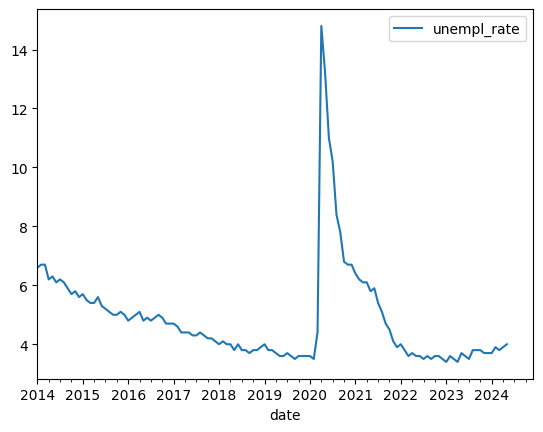

In [ ]:
ur_long.plot(x="date", y="unempl_rate")
plt.show()
# Conclusion:
# The plot shows a steady decrease in the unemployment rate with an increase near the 2020 year.
# This increase is likely the effect of the COVID-19 pandemic and its impact on shutting down most of the US economy. 

# In general, data is often provided (_especially by governments_) in a format that is easily read by people but not by machines. 
# The .melt() method is a handy tool for reshaping data into a useful form.

In [ ]:
%timeit ur_long.loc[ur_long["month"]=="Jan"]
%timeit ur_long[ur_long["month"]=="Jan"]
%timeit ur_long.query('month=="Jan"')
# → .query() is not efficient

459 µs ± 130 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
469 µs ± 113 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.07 ms ± 149 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
